Processed 3 files in folder: C:\Users\halol.tccrnd1\Desktop\FTCT\175 65 R15
Processed 3 files in folder: C:\Users\halol.tccrnd1\Desktop\FTCT\205 55 R16
Processed 3 files in folder: C:\Users\halol.tccrnd1\Desktop\FTCT\155 80 R13
Yayy!Task Completed!
😀
Outliers: []


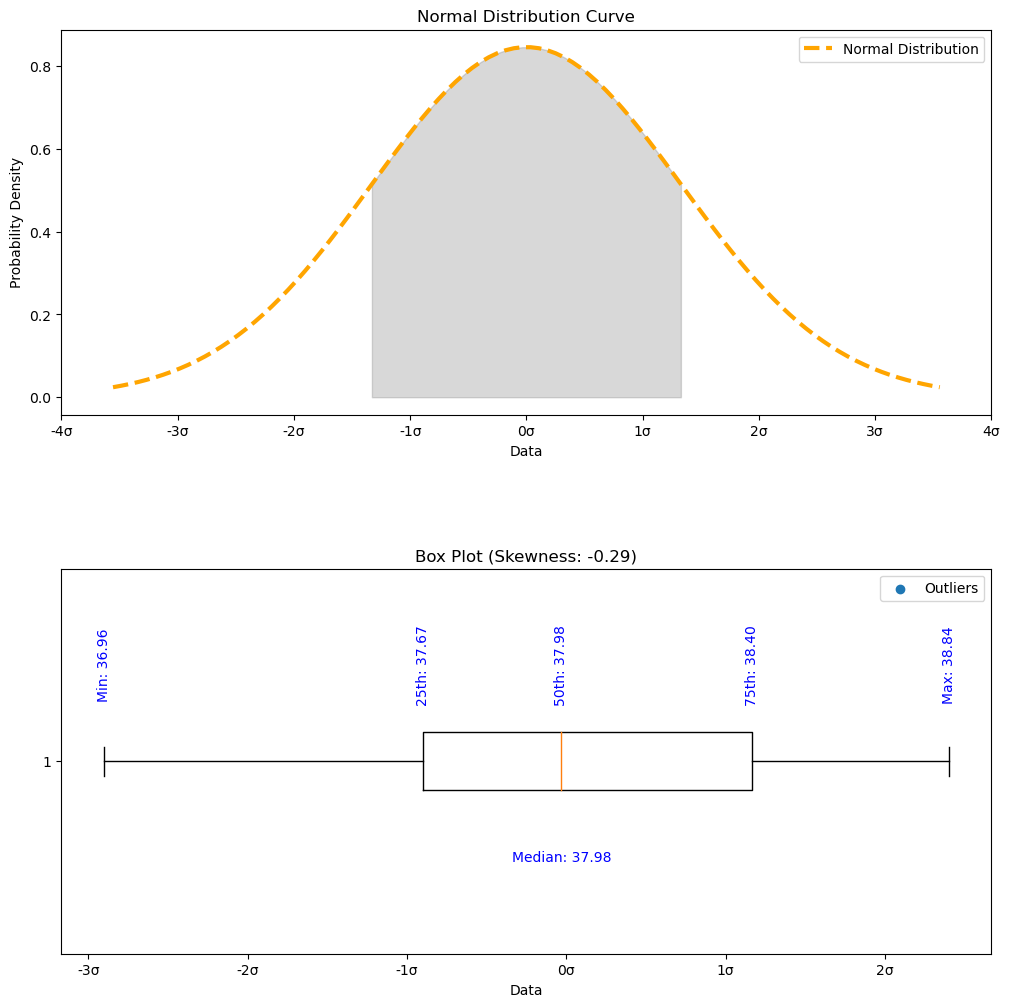

The percentage of values within -1 to 1 sigma range: 68.27


In [7]:
import os
import glob
from openpyxl import load_workbook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import norm

# Define the folder paths and corresponding output file names
folder_paths = [
   
    r"C:\Users\halol.tccrnd1\Desktop\FTCT\175 65 R15",
    r"C:\Users\halol.tccrnd1\Desktop\FTCT\205 55 R16", 
    r"C:\Users\halol.tccrnd1\Desktop\FTCT\155 80 R13",
]
output_file_names = [
   
    "Control Tyre Data - 175 65 R15.xlsx",
    "Control Tyre Data - 205 55 R16.xlsx", 
    "Control Tyre Data - 155 80 R13.xlsx"
]

# Iterate over the folders
for folder_path, output_file_name in zip(folder_paths, output_file_names):
    # Load the output workbook
    output_file_path = os.path.join(folder_path, output_file_name)
    output_wb = load_workbook(output_file_path)

    # Get the output sheet from the output workbook (assuming it's the first sheet)
    output_sheet = output_wb.worksheets[0]

    # Define the starting row in the output sheet
    start_row = output_sheet.max_row + 1

    # Find all Excel files in the folder
    excel_files = glob.glob(os.path.join(folder_path, "*.xlsm"))

    # Initialize the values list
    values = []

    # Iterate over the Excel files
    for excel_file in excel_files:
        # Load the Excel file
        wb = load_workbook(excel_file, data_only=True)

        # Get the desired values from fixed cells
        value1 = wb["Results"]["D15"].value
        value2 = wb["Results"]["D29"].value

        # Append the values as a tuple to the list
        values.append((value1, value2))

    # Calculate variations and select values with minimum variance
    selected_values = None  # Initialize the selected values
    min_variance = float('inf')  # Initialize the minimum variance

    for i in range(len(values)):
        curr_values = values[i]
        is_selected = True

        # Check if the current values have variation less than +-3% with all previous values
        for j in range(i):
            prev_values = values[j]
            variation1 = abs(curr_values[0] - prev_values[0]) / prev_values[0]
            variation2 = abs(curr_values[1] - prev_values[1]) / prev_values[1]

            # If any variation exceeds 3%, mark it as not selected
            if variation1 > 0.03 or variation2 > 0.03:
                is_selected = False
                break

        # If all variations are within 3%, calculate variance and select values with minimum variance
        if is_selected:
            curr_variance = np.var(curr_values)
            if curr_variance < min_variance:
                min_variance = curr_variance
                selected_values = curr_values

    # Append the selected values to the output sheet
    if selected_values is not None:
        # Write the selected values to the output sheet
        output_sheet["C{}".format(start_row)] = selected_values[0]
        output_sheet["D{}".format(start_row)] = selected_values[1]
        
    print("Processed {} files in folder: {}".format(len(excel_files), folder_path))
print("Yayy!Task Completed!")
print("\U0001F600")
    # Save the output workbook
output_wb.save(output_file_path)
    
#DATA VISUALISATION#
def detect_outliers_iqr(data):
    """
    Detects outliers in a given dataset using the IQR method.
    
    Args:
    data (list or numpy array): The dataset for which outliers need to be detected.
    
    Returns:
    list: A list of outlier values.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3) of the data
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers in the dataset
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers


# Read the Excel file and extract the values from the specified range of cells
df = pd.read_excel(r'C:\Users\halol.tccrnd1\Desktop\FTCT\175 65 R15\Control Tyre Data - 175 65 R15.xlsx'
, sheet_name='Sheet1', usecols='D', skiprows=9, nrows=start_row, header=None)
values = df.values.flatten().tolist()

# Calculate skewness
skewness = skew(values)

# Detect outliers using IQR method
outliers = detect_outliers_iqr(values)

# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the histogram on the first subplot
#ax1.hist(values, bins=10, density=True, alpha=0.75, color='green')
#ax1.set_xlabel('Data')
#ax1.set_ylabel('Probability Density')
#ax1.set_title('Histogram')

mean = np.mean(values)
std_dev = np.std(values)

# Generate x-values for the normal distribution curve
x = np.linspace(mean - 2.667 * std_dev, mean + 2.667 * std_dev, 100)
y = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
lower_bound = mean - std_dev
upper_bound = mean + std_dev

# Plot the normal distribution curve
ax1.plot(x, y, color='orange', linestyle='dashed', linewidth=3, label='Normal Distribution')
ax1.fill_between(x, y, where=((x >= lower_bound) & (x <= upper_bound)), color='gray', alpha=0.3)
ax1.set_xlabel('Data')
ax1.set_ylabel('Probability Density')
ax1.set_title('Normal Distribution Curve')
ax1.legend(['Normal Distribution'])

# Plot the box plot on the second subplot
boxplot = ax2.boxplot(values, vert=False)
ax2.set_xlabel('Data')
ax2.set_title(f'Box Plot (Skewness: {skewness:.2f})')

# Add x-axis labels representing standard deviations
mean = np.mean(values)
std_dev = np.std(values)
x_ticks = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 9)
x_ticklabels = [f'{i}σ' for i in range(-4, 5)]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticklabels)
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticklabels)

# Add text annotations on the box plot
min_val = np.min(values)
max_val = np.max(values)
q25 = np.percentile(values, 25)
q50 = np.percentile(values, 50)
q75 = np.percentile(values, 75)
median_val = np.median(values)

ax2.text(min_val, 1.25, f'Min: {min_val:.2f}', rotation='vertical',ha='center', va='center', color='blue')
ax2.text(max_val, 1.25, f'Max: {max_val:.2f}',rotation='vertical', ha='center', va='center', color='blue')
ax2.text(q25, 1.25, f'25th: {q25:.2f}',rotation='vertical', ha='center', va='center', color='blue')
ax2.text(q50, 1.25, f'50th: {q50:.2f}',rotation='vertical', ha='center', va='center', color='blue')
ax2.text(q75, 1.25, f'75th: {q75:.2f}',rotation='vertical', ha='center', va='center', color='blue')
ax2.text(median_val, 0.75, f'Median: {median_val:.2f}', ha='center', va='center', color='blue')

# Highlight outliers in the box plot
if boxplot['fliers']:
    outlier_vals = [item.get_xdata() for item in boxplot['fliers']]
    ax2.scatter(outlier_vals, np.ones_like(outlier_vals), marker='o', label='Outliers')

ax2.legend()


# Print the detected outliers
print("Outliers:", [round(val, 2) for val in outliers])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()
# Calculate the percentage of values within -1 to 1 sigma range
within_1sigma = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)
within_1sigma_percentage = within_1sigma * 100

print("The percentage of values within -1 to 1 sigma range:", round(within_1sigma_percentage, 2))